In [1]:
#ссылка на гит репозиторий:
#импортируем все библиотеки
import pandas as pd 
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model, metrics
from sklearn.svm import SVR
from sklearn import ensemble

In [2]:
#импортируем данные
data = pd.read_csv("train.csv", parse_dates = ['date'])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,2016-09-02,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,2016-09-02,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [4]:
#переведем json столбцы в обычные столбцы датафрейма (добавим расчетные признаки)
jsonO = data['totals'].map(str).apply(json.loads)
data['visits'] = jsonO.apply(lambda x: x['visits']) #кол-во посещений маг
data['hits'] = jsonO.apply(lambda x: x['hits']) #кол-во удачных посещений

jsonO = data['device'].map(str).apply(json.loads)
data['browser'] = jsonO.apply(lambda x: x['browser']) 
data['isMobile'] = jsonO.apply(lambda x: x['isMobile'])

jsonO = data['geoNetwork'].map(str).apply(json.loads)
data['country'] = jsonO.apply(lambda x: x['country'])
data['city'] = jsonO.apply(lambda x: x['city'])

data.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,visits,hits,browser,isMobile,country,city
0,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385,1,1,Chrome,False,Turkey,Izmir
1,Organic Search,2016-09-02,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147,1,1,Firefox,False,Australia,not available in demo dataset
2,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386,1,1,Chrome,False,Spain,Madrid
3,Organic Search,2016-09-02,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213,1,1,UC Browser,False,Indonesia,not available in demo dataset
4,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600,1,1,Chrome,True,United Kingdom,not available in demo dataset


In [5]:
#еще нам нужна выручка, она должна быть в столбце transactionRevenue, но там нет
data['transactionRevenue'] = jsonO.apply(lambda x: x['transactionRevenue']) #выручка

KeyError: 'transactionRevenue'

In [6]:
#Надо спрогнозировать выручку, но значения выручки не находятся (см пред ячейку), поэтому решила добавить новый столбец, который рандомно генерирует значения от 150 до 2000 
data['transactionRevenue'] = np.random.randint(150, 2000, data.shape[0])
data.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,visits,hits,browser,isMobile,country,city,transactionRevenue
0,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385,1,1,Chrome,False,Turkey,Izmir,1411
1,Organic Search,2016-09-02,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147,1,1,Firefox,False,Australia,not available in demo dataset,971
2,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386,1,1,Chrome,False,Spain,Madrid,1657
3,Organic Search,2016-09-02,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213,1,1,UC Browser,False,Indonesia,not available in demo dataset,905
4,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600,1,1,Chrome,True,United Kingdom,not available in demo dataset,1065


In [7]:
#уберем  ненужные json столбцы
df = data.drop(['device', 'geoNetwork', 'totals', 'trafficSource'], axis = 1)
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,visits,hits,browser,isMobile,country,city,transactionRevenue
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,1,1,Chrome,False,Turkey,Izmir,1411
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,1,1,Firefox,False,Australia,not available in demo dataset,971
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,1,1,Chrome,False,Spain,Madrid,1657
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,1,1,UC Browser,False,Indonesia,not available in demo dataset,905
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,1,1,Chrome,True,United Kingdom,not available in demo dataset,1065


In [8]:
#возьмем 10% данных 
df.sample(frac = 0.1) 

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,visits,hits,browser,isMobile,country,city,transactionRevenue
668644,Social,2017-01-30,8566069685069795167,8566069685069795167_1485794907,Not Socially Engaged,1485794907,1,1485794907,1,1,Chrome,True,Mexico,not available in demo dataset,508
89020,Social,2017-03-18,5932916573665322938,5932916573665322938_1489856714,Not Socially Engaged,1489856714,1,1489856714,1,2,Chrome,False,Netherlands,not available in demo dataset,429
64884,Referral,2017-08-01,1420571529363353703,1420571529363353703_1501598652,Not Socially Engaged,1501598652,7,1501598652,1,3,Chrome,False,United States,New York,772
423330,Direct,2016-09-14,6195381308444969371,6195381308444969371_1473860038,Not Socially Engaged,1473860038,1,1473860038,1,1,Chrome,False,Belgium,not available in demo dataset,400
641685,Organic Search,2017-02-09,4704498735350214812,4704498735350214812_1486649133,Not Socially Engaged,1486649133,1,1486649133,1,1,Chrome,True,Netherlands,not available in demo dataset,467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505995,Social,2016-09-05,6795928730954159425,6795928730954159425_1473064612,Not Socially Engaged,1473064612,1,1473064612,1,1,Chrome,True,Hong Kong,Hong Kong,469
300468,Display,2016-12-19,594427768822234023,594427768822234023_1482188718,Not Socially Engaged,1482188718,1,1482188718,1,8,Chrome,False,United States,Sunnyvale,545
176628,Social,2016-11-17,6095909707122713025,6095909707122713025_1479393652,Not Socially Engaged,1479393652,1,1479393652,1,2,Safari,False,India,not available in demo dataset,389
396297,Social,2016-10-02,1552549457578619320,1552549457578619320_1475459018,Not Socially Engaged,1475459018,1,1475459018,1,1,Chrome,False,United States,not available in demo dataset,1722


In [9]:
df.info()
#видим, что пустых значений нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   channelGrouping       903653 non-null  object        
 1   date                  903653 non-null  datetime64[ns]
 2   fullVisitorId         903653 non-null  object        
 3   sessionId             903653 non-null  object        
 4   socialEngagementType  903653 non-null  object        
 5   visitId               903653 non-null  int64         
 6   visitNumber           903653 non-null  int64         
 7   visitStartTime        903653 non-null  int64         
 8   visits                903653 non-null  object        
 9   hits                  903653 non-null  object        
 10  browser               903653 non-null  object        
 11  isMobile              903653 non-null  bool          
 12  country               903653 non-null  object        
 13 

In [10]:
#присвоим 1 - если тру, 0 - если фолс
df['isMobile'] = df['isMobile'].astype(int)
#еще посчитать логарифм от выручки
df['log_revenue'] = np.log(df['transactionRevenue'])
df

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,visits,hits,browser,isMobile,country,city,transactionRevenue,log_revenue
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,1,1,Chrome,0,Turkey,Izmir,1411,7.252054
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,1,1,Firefox,0,Australia,not available in demo dataset,971,6.878326
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,1,1,Chrome,0,Spain,Madrid,1657,7.412764
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,1,1,UC Browser,0,Indonesia,not available in demo dataset,905,6.807935
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,1,1,Chrome,1,United Kingdom,not available in demo dataset,1065,6.970730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903648,Social,2017-01-04,5123779100307500332,5123779100307500332_1483554750,Not Socially Engaged,1483554750,1,1483554750,1,17,Chrome,0,Puerto Rico,not available in demo dataset,551,6.311735
903649,Social,2017-01-04,7231728964973959842,7231728964973959842_1483543798,Not Socially Engaged,1483543798,1,1483543798,1,18,Chrome,1,Sri Lanka,not available in demo dataset,422,6.045005
903650,Social,2017-01-04,5744576632396406899,5744576632396406899_1483526434,Not Socially Engaged,1483526434,1,1483526434,1,24,Android Webview,1,South Korea,Seoul,728,6.590301
903651,Social,2017-01-04,2709355455991750775,2709355455991750775_1483592857,Not Socially Engaged,1483592857,1,1483592864,1,24,Chrome,0,Indonesia,not available in demo dataset,643,6.466145


In [11]:
#поменяем тип логарифма выручки с флот на инт64
df['log_revenue'] = df['log_revenue'].astype(int64)
df.info()

NameError: name 'int64' is not defined

In [12]:
#Построение моделей
#разбиение на обучающую и тестовую
X = df[['visitNumber', 'hits', 'isMobile']].to_numpy()
Y = df['log_revenue'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [13]:
#Линейная регрессия
#строим модель
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#делаем предсказание
lr_predictions = linear_regressor.predict(X_test)

In [31]:
#выведем значения тестовой выборки
print (y_test)

[7.42892719 7.32646561 7.45414108 ... 6.48768402 7.56941179 7.06731985]


In [33]:
#выведем значения получившиеся после прогноза (видим, что они в принципе близки)
print (lr_predictions)

[6.81153279 6.80936986 6.81129873 ... 6.81153279 6.80918495 6.81139119]


In [78]:
#кросс валидация k-fold на 5 фолдов 
#видим, что в среднем наша ошибка = 4 с отклонением = 1 (число отр потому что по метрика уменьшается, когда модель становится лучше)
linear_scoring = cross_val_score(linear_regressor, X, Y, cv=5)
print (linear_scoring)
print ('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

[ 4.26746279e-06 -1.18214585e-05 -7.59885230e-06  5.47326211e-06
 -1.02106657e-05]
mean: -3.978050310893266e-06, std: 7.359219328419329e-06


{'whiskers': [<matplotlib.lines.Line2D at 0x219486d4a88>,
 'caps': [<matplotlib.lines.Line2D at 0x219486d0cc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x219486d4888>],
 'medians': [<matplotlib.lines.Line2D at 0x2194868bd88>],
 'fliers': [<matplotlib.lines.Line2D at 0x21948686ec8>],
 'means': []}

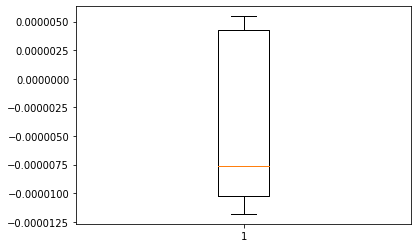

In [79]:
plt.boxplot(linear_scoring)

In [85]:
#случайный лес
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [86]:
rf_predictions = random_forest.predict(X_test)

In [87]:
print (y_test)

[7.42892719 7.32646561 7.45414108 ... 6.48768402 7.56941179 7.06731985]


In [88]:
print (rf_predictions)

[6.82739427 6.81311623 6.80995905 ... 6.82739427 6.8073888  6.81798096]


In [89]:
rf_scoring = cross_val_score(random_forest, X, Y, cv=5)
print (rf_scoring)
print ('mean: {}, std: {}'.format(rf_scoring.mean(), rf_scoring.std()))

[-0.00460025 -0.00499659 -0.0048059  -0.00489832 -0.00400415]
mean: -0.004661041580800518, std: 0.00035357737026195954


{'whiskers': [<matplotlib.lines.Line2D at 0x21948320408>,
 'caps': [<matplotlib.lines.Line2D at 0x21948317f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x219483175c8>],
 'medians': [<matplotlib.lines.Line2D at 0x21948312b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x21947fcdbc8>],
 'means': []}

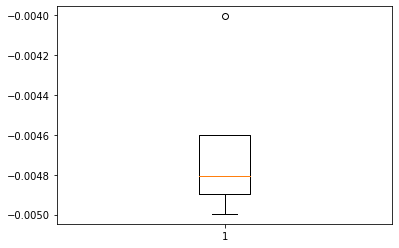

In [90]:
plt.boxplot(rf_scoring)

In [71]:
#Градиентный бустинг
gradient_boosting = ensemble.GradientBoostingRegressor()
gradient_boosting.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [72]:
gb_predictions = gradient_boosting.predict(X_test)

In [73]:
print (y_test)

[7.42892719 7.32646561 7.45414108 ... 6.48768402 7.56941179 7.06731985]


In [74]:
print (gb_predictions)

[6.81356948 6.81063967 6.8092992  ... 6.81356948 6.80842205 6.81356948]


In [75]:
gb_scoring = cross_val_score(gradient_boosting, X, Y, cv=5)
print (gb_scoring)
print ('mean: {}, std: {}'.format(gb_scoring.mean(), gb_scoring.std()))

[-7.65391520e-05 -9.80938472e-05 -1.82698949e-04 -1.24212552e-04
 -4.86348062e-05]
mean: -0.00010603586130275566, std: 4.568508218039793e-05


{'whiskers': [<matplotlib.lines.Line2D at 0x21a334a6fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x21a334db848>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a3349d948>],
 'medians': [<matplotlib.lines.Line2D at 0x21a334e4c08>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a334e7ec8>],
 'means': []}

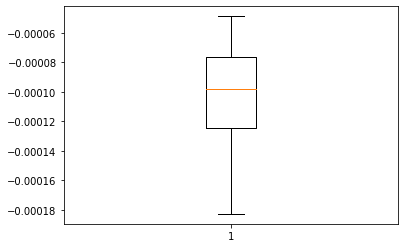

In [76]:
plt.boxplot(gb_scoring)

In [ ]:
svr = SVR(kernel='linear')
svr = svr.fit(X_train, y_train)

In [ ]:
svr_predictions = svr.predict(X_test)

In [ ]:
print (y_test)

In [ ]:
print (svr_predictions)

In [ ]:
svr_scoring = cross_val_score(svr, X, Y, cv=5)
print (svr_scoring)
print ('mean: {}, std: {}'.format(svr_scoring.mean(), svr_scoring.std()))

In [ ]:
plt.boxplot(svr_scoring)